In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import DataLoader, random_split


To Do:
Need to decide on input size
Need to address MRI slice considerations


In [ ]:
# Google Colab mount removed - not needed for local execution


Mounted at /content/drive


In [ ]:
import pandas as pd

# Format images w.r.t. excel doc

# 1: Read in the CSV
df = pd.read_csv('C:/FeatureEx/images/image_labels.csv')
print(df)
image_list = df['image_path']
print(image_list)
#df['image_path'] = image_list
# 2: Update first column ('image_path') to include full paths
# Assuming '001.png', '002.png', etc. are the values already in the column
# and are located in the 'images/' directory
#print(df['image_path'])
#df['image_path'] = df['image_path'].apply(lambda x: f'images/{x}')
#df = pd.read_csv('image_labels.csv')
#df['image_path'] = df['image_path'].apply(lambda x: '/content/drive/MyDrive/FeatureEx/images/' + x)
#df.to_csv('image_labels.csv', index=False)
# 3: Save updated csv
#df.to_csv('C:/FeatureEx/images/image_labels.csv', index=False)


                                          image_path  label
0    /content/drive/MyDrive/FeatureEx/images/001.png      1
1    /content/drive/MyDrive/FeatureEx/images/002.png      1
2    /content/drive/MyDrive/FeatureEx/images/003.png      1
3    /content/drive/MyDrive/FeatureEx/images/004.png      1
4    /content/drive/MyDrive/FeatureEx/images/005.png      1
..                                               ...    ...
145  /content/drive/MyDrive/FeatureEx/images/146.png      3
146  /content/drive/MyDrive/FeatureEx/images/147.png      3
147  /content/drive/MyDrive/FeatureEx/images/148.png      3
148  /content/drive/MyDrive/FeatureEx/images/149.png      3
149  /content/drive/MyDrive/FeatureEx/images/150.png      3

[150 rows x 2 columns]
0      /content/drive/MyDrive/FeatureEx/images/001.png
1      /content/drive/MyDrive/FeatureEx/images/002.png
2      /content/drive/MyDrive/FeatureEx/images/003.png
3      /content/drive/MyDrive/FeatureEx/images/004.png
4      /content/drive/MyDrive/Featur

In [ ]:
#image_list = [f"{str(i).zfill(3)}.png" for i in range(1, 151)]


In [ ]:
print(image_list)

0      /content/drive/MyDrive/FeatureEx/images/001.png
1      /content/drive/MyDrive/FeatureEx/images/002.png
2      /content/drive/MyDrive/FeatureEx/images/003.png
3      /content/drive/MyDrive/FeatureEx/images/004.png
4      /content/drive/MyDrive/FeatureEx/images/005.png
                            ...                       
145    /content/drive/MyDrive/FeatureEx/images/146.png
146    /content/drive/MyDrive/FeatureEx/images/147.png
147    /content/drive/MyDrive/FeatureEx/images/148.png
148    /content/drive/MyDrive/FeatureEx/images/149.png
149    /content/drive/MyDrive/FeatureEx/images/150.png
Name: image_path, Length: 150, dtype: object


In [ ]:
!dir C:/FeatureEx

# Step 1: Define directory containing PNGs
#image_dir = 'C:/FeatureEx/images/'  # <-- Change this if needed

# Step 2: Get and sort all PNG files in the directory
#png_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# Step 3: Generate the target filenames (001.png, ..., 150.png)
#image_list = [f"{str(i).zfill(3)}.png" for i in range(1, len(png_files) + 1)]

# Step 4: Rename the files
#for old_name, new_name in zip(png_files, image_list):
#    old_path = os.path.join(image_dir, old_name)
#    new_path = os.path.join(image_dir, new_name)
#    os.rename(old_path, new_path)

#print(f"Renamed {len(image_list)} files.")


'Image Feature Ex and PCA.ipynb'   images   Test_FE_PCA.ipynb


In [ ]:
# ========================
# Dataset Class Def
# ========================
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = int(self.data.iloc[idx, 1]) - 1  # labs 0-indexed
        image = Image.open(img_path).convert('L')  # grayscale the image
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# ========================
# CNN Def
# ========================
'''
class SimpleCNN(nn.Module):
    def __init__(self, feature_dim=64):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),  # Grayscale = 1 channel
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 7 * 7, feature_dim)
        self.fc2 = nn.Linear(feature_dim, 3)  # 3 classes

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        feats = self.fc1(x)
        out = self.fc2(feats)
        return out, feats
  '''

'\nclass SimpleCNN(nn.Module):\n    def __init__(self, feature_dim=64):\n        super(SimpleCNN, self).__init__()\n        self.features = nn.Sequential(\n            nn.Conv2d(1, 8, kernel_size=3, padding=1),  # Grayscale = 1 channel\n            nn.ReLU(),\n            nn.MaxPool2d(2),\n            nn.Conv2d(8, 16, kernel_size=3, padding=1),\n            nn.ReLU(),\n            nn.MaxPool2d(2),\n        )\n        self.flatten = nn.Flatten()\n        self.fc1 = nn.Linear(16 * 7 * 7, feature_dim)\n        self.fc2 = nn.Linear(feature_dim, 3)  # 3 classes\n\n    def forward(self, x):\n        x = self.features(x)\n        x = self.flatten(x)\n        feats = self.fc1(x)\n        out = self.fc2(feats)\n        return out, feats\n  '

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# ========================
# ResNet Model Definition
# ========================
class ResNetFeatureExtractor(nn.Module):
    """
    ResNet18-based model for classification and feature extraction.
    Adapted for grayscale medical images.
    """
    def __init__(self, num_classes=3, feature_dim=512, pretrained=True):
        super(ResNetFeatureExtractor, self).__init__()

        # Load pretrained ResNet18
        self.resnet = models.resnet18(pretrained=pretrained)

        # Modify first conv layer for grayscale (1 channel) input
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Remove the original fully connected layer
        num_features = self.resnet.fc.in_features  # 512 for ResNet18
        self.resnet.fc = nn.Identity()

        # Custom feature extraction and classification layers
        self.feature_extractor = nn.Sequential(
            nn.Linear(num_features, feature_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.classifier = nn.Linear(feature_dim, num_classes)

    def forward(self, x):
        # Extract features using ResNet backbone
        x = self.resnet(x)  # [batch_size, 512]

        # Extract custom features
        features = self.feature_extractor(x)  # [batch_size, feature_dim]

        # Classification
        logits = self.classifier(features)  # [batch_size, num_classes]

        return logits, features

print("ResNet model defined")
print("Uses ResNet18 with ImageNet pretrained weights")
print("Input: [batch, 1, 224, 224] grayscale images")
print("Output: logits [batch, 3] and features [batch, 512]")


In [ ]:
# ========================
# Prep Data
# ========================
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # ImageNet normalization for grayscale
])

dataset = CustomImageDataset('C:/FeatureEx/images/image_labels.csv', transform=transform)

# Split into train and validation
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Smaller batch for ResNet
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

print(f"Dataset split: {train_size} train, {val_size} validation")
print(f"Image size: 224x224 (ResNet standard)")
print(f"Batch size: 16")


In [ ]:
# ========================
# Dataset Split
# ========================
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# ========================
# MIssing Image Check
# ========================

df = pd.read_csv('C:/FeatureEx/images/image_labels.csv')
missing = [path for path in df['image_path'] if not os.path.exists(path)]
print(f"{len(missing)} missing files:", missing[:5])


0 missing files: []


In [ ]:
# ========================
# Training Setup
# ========================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create ResNet model
model = ResNetFeatureExtractor(
    num_classes=3,
    feature_dim=512,
    pretrained=True
).to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Lower LR for pretrained model

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, verbose=True
)

# Training tracking
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 50
best_val_acc = 0.0

print(f"
Training for {num_epochs} epochs")


Training...
Epoch 1/100: Train Loss: 1.1061, Train Acc: 0.3267, Val Loss: 1.1016, Val Acc: 0.3333
Epoch 1, Loss: 1.1061
Epoch 2/100: Train Loss: 1.0538, Train Acc: 0.5067, Val Loss: 1.0983, Val Acc: 0.3333
Epoch 2, Loss: 1.0538
Epoch 3/100: Train Loss: 0.9666, Train Acc: 0.8600, Val Loss: 1.0992, Val Acc: 0.3333
Epoch 3, Loss: 0.9666
Epoch 4/100: Train Loss: 0.8309, Train Acc: 0.8867, Val Loss: 1.1141, Val Acc: 0.3400
Epoch 4, Loss: 0.8309
Epoch 5/100: Train Loss: 0.6903, Train Acc: 0.9333, Val Loss: 1.1451, Val Acc: 0.6333
Epoch 5, Loss: 0.6903
Epoch 6/100: Train Loss: 0.4879, Train Acc: 0.9200, Val Loss: 1.2015, Val Acc: 0.6333
Epoch 6, Loss: 0.4879
Epoch 7/100: Train Loss: 0.3389, Train Acc: 0.9333, Val Loss: 1.3249, Val Acc: 0.6333
Epoch 7, Loss: 0.3389
Epoch 8/100: Train Loss: 0.2433, Train Acc: 0.9600, Val Loss: 1.1008, Val Acc: 0.6467
Epoch 8, Loss: 0.2433
Epoch 9/100: Train Loss: 0.1599, Train Acc: 0.9667, Val Loss: 0.6159, Val Acc: 0.6533
Epoch 9, Loss: 0.1599
Epoch 10/100: Tr

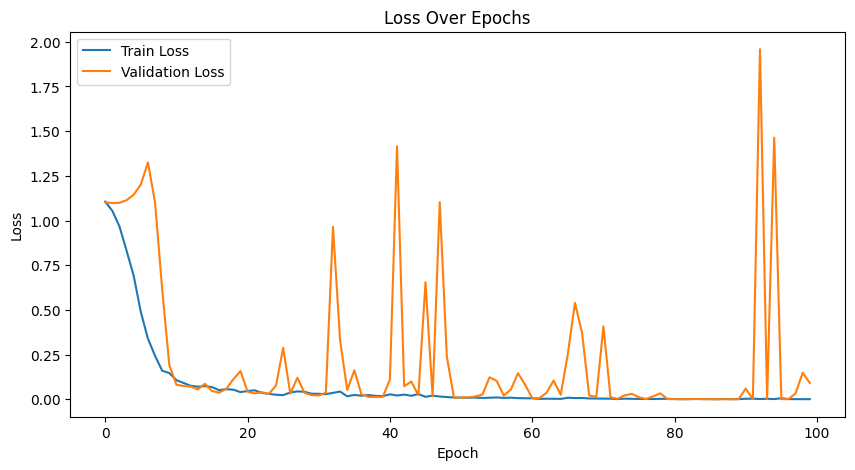

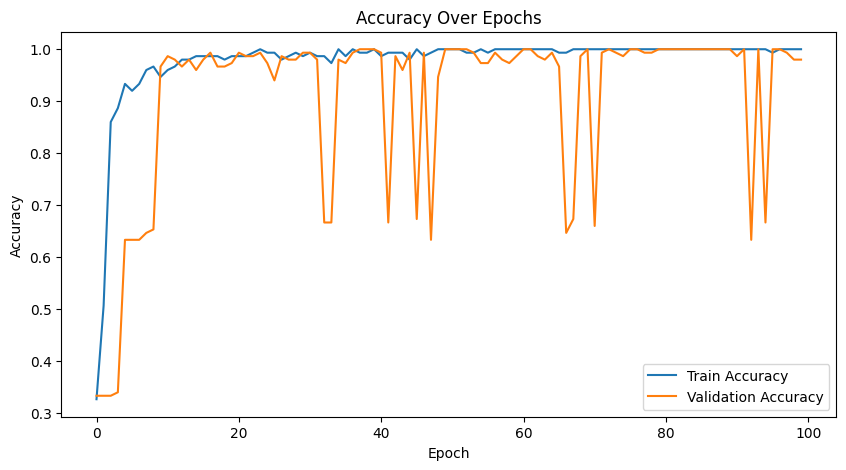

In [ ]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# ========================
# Feature Extraction
# ========================
model.eval()
all_features = []
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in DataLoader(dataset, batch_size=32, shuffle=False):
        images = images.to(device)
        logits, features = model(images)
        preds = torch.argmax(logits, dim=1)

        all_features.append(features.cpu())
        all_labels.extend(labels)
        all_preds.extend(preds.cpu().numpy())

features_np = torch.cat(all_features, dim=0).numpy()
labels_np = np.array(all_labels)
predictions_np = np.array(all_preds)

In [ ]:
for i in range(55):  # first 5 examples
    print(f"Image {i}: Predicted = {predictions_np[i]}, Actual = {labels_np[i]}")


Image 0: Predicted = 0, Actual = 0
Image 1: Predicted = 0, Actual = 0
Image 2: Predicted = 0, Actual = 0
Image 3: Predicted = 0, Actual = 0
Image 4: Predicted = 0, Actual = 0
Image 5: Predicted = 0, Actual = 0
Image 6: Predicted = 0, Actual = 0
Image 7: Predicted = 0, Actual = 0
Image 8: Predicted = 0, Actual = 0
Image 9: Predicted = 0, Actual = 0
Image 10: Predicted = 0, Actual = 0
Image 11: Predicted = 0, Actual = 0
Image 12: Predicted = 0, Actual = 0
Image 13: Predicted = 0, Actual = 0
Image 14: Predicted = 0, Actual = 0
Image 15: Predicted = 0, Actual = 0
Image 16: Predicted = 0, Actual = 0
Image 17: Predicted = 0, Actual = 0
Image 18: Predicted = 0, Actual = 0
Image 19: Predicted = 0, Actual = 0
Image 20: Predicted = 0, Actual = 0
Image 21: Predicted = 0, Actual = 0
Image 22: Predicted = 0, Actual = 0
Image 23: Predicted = 0, Actual = 0
Image 24: Predicted = 0, Actual = 0
Image 25: Predicted = 0, Actual = 0
Image 26: Predicted = 0, Actual = 0
Image 27: Predicted = 0, Actual = 0
Im

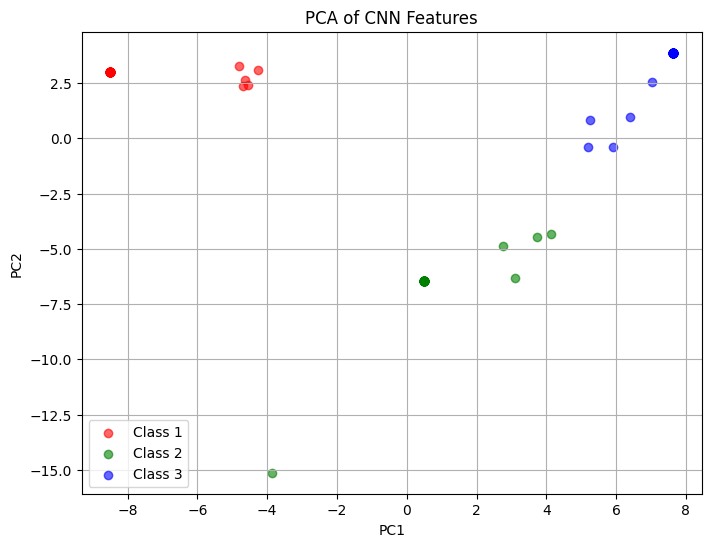

In [ ]:
# ========================
# PCA with Plot
# ========================
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_np)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

colors = ['red', 'green', 'blue']
label_names = ['Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))
for i in range(3):
    idxs = labels_np == i
    plt.scatter(pca_result[idxs, 0], pca_result[idxs, 1],
                label=label_names[i], color=colors[i], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of CNN Features')
plt.legend()
plt.grid(True)
plt.show()

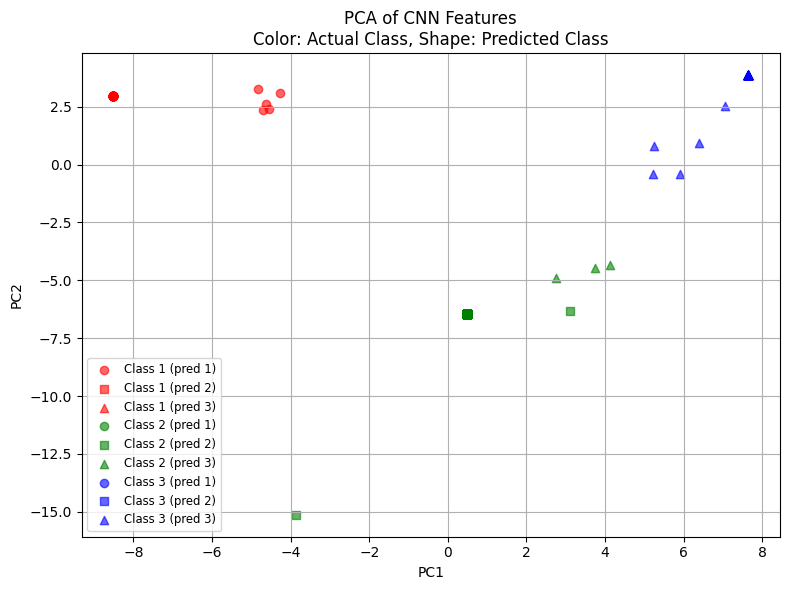

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# ========================
# PCA with Plot
# ========================
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_np)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']  # Circle, square, triangle
label_names = ['Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(8, 6))

for actual_class in range(3):
    for predicted_class in range(3):
        idxs = (labels_np == actual_class) & (predictions_np == predicted_class)
        plt.scatter(pca_result[idxs, 0], pca_result[idxs, 1],
                    label=f'{label_names[actual_class]} (pred {predicted_class+1})',
                    color=colors[actual_class], marker=markers[predicted_class], alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of CNN Features\nColor: Actual Class, Shape: Predicted Class')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


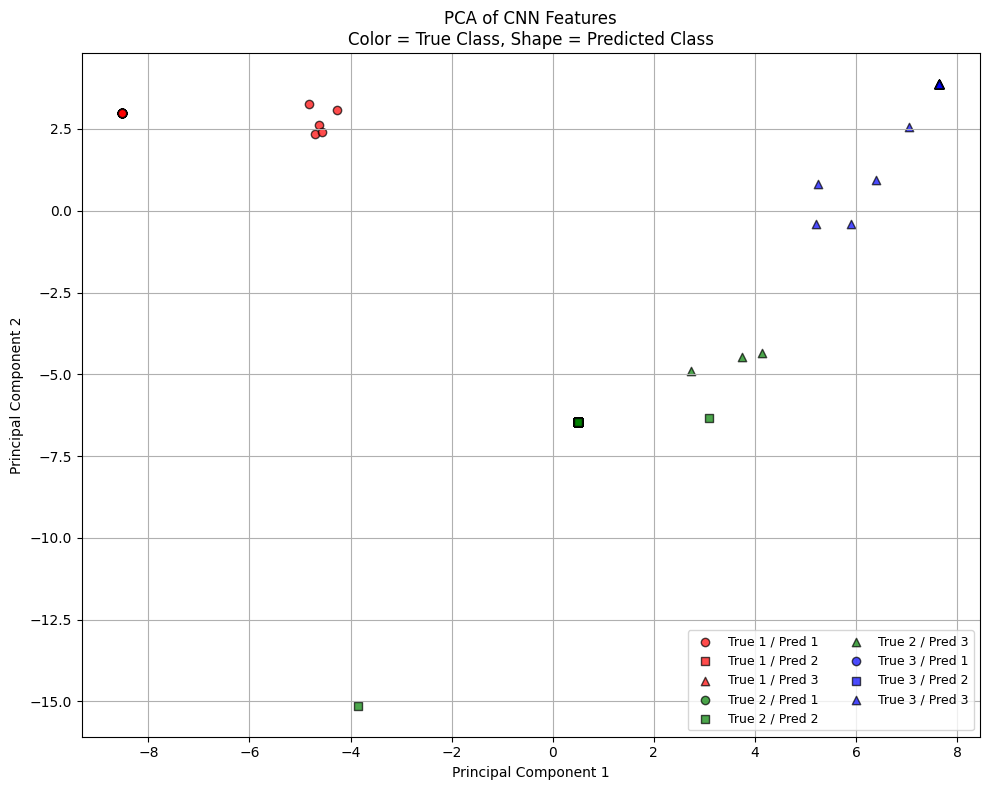

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# ----- Prep true labels and predicted labels -----
true_labels = []
pred_labels = []
all_features = []

model.eval()
with torch.no_grad():
    for images, labels in DataLoader(dataset, batch_size=32, shuffle=False):
        images = images.to(device)
        outputs, features = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_features.append(features.cpu())
        true_labels.extend(labels.numpy())
        pred_labels.extend(preds.cpu().numpy())

features_np = torch.cat(all_features, dim=0).numpy()
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# ----- PCA -----
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_np)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# ----- Plot -----
colors = ['red', 'green', 'blue']
color_labels = ['Class 1', 'Class 2', 'Class 3']
markers = ['o', 's', '^']  # Circle, square, triangle for predicted class 0,1,2

plt.figure(figsize=(10, 8))
for true_class in range(3):
    for pred_class in range(3):
        idxs = (true_labels == true_class) & (pred_labels == pred_class)
        plt.scatter(
            pca_result[idxs, 0], pca_result[idxs, 1],
            c=colors[true_class],
            marker=markers[pred_class],
            edgecolors='k',
            label=f'True {true_class+1} / Pred {pred_class+1}',
            alpha=0.7
        )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CNN Features\nColor = True Class, Shape = Predicted Class')
plt.grid(True)
plt.legend(loc='best', fontsize=9, ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
# ========================

In [ ]:
# ========================

In [ ]:
# ========================# ========================# ========================
# PyRadiomics
# ========================# ========================# ========================

In [ ]:
!pip install SimpleITK pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 49.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
# ========================
# Feature Extraction with ResNet
# ========================
print("Extracting features using trained ResNet...")

model.eval()
model = model.to(device)

all_features = []
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        
        # Get both predictions and features
        logits, features = model(images)
        _, predicted = torch.max(logits, 1)
        
        all_features.append(features.cpu().numpy())
        all_labels.append(labels.numpy())
        all_predictions.append(predicted.cpu().numpy())

# Combine all batches
import numpy as np
features = np.vstack(all_features)
labels = np.concatenate(all_labels)
predictions = np.concatenate(all_predictions)

print(f"
Extracted features shape: {features.shape}")
print(f"Features from {len(labels)} images")
print(f"Feature dimension: {features.shape[1]} (ResNet)")
print(f"
Accuracy on training set: {100.0 * (predictions == labels).mean():.2f}%")


INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Applying custom setting overrides: {'binWidth': 25, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'verbose': True}


In [ ]:
import os

radiomics_features = []
radiomics_labels = []

for idx in range(len(dataset)):
    img_path = dataset.data.iloc[idx, 0]
    label = int(dataset.data.iloc[idx, 1]) - 1

    # Load image with SimpleITK
    image = sitk.ReadImage(img_path)

    # Create dummy mask (e.g., entire image is ROI)
    mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
    mask.CopyInformation(image)


    # Convert scalar grayscale image
    image = sitk.ReadImage(img_path)

    # Convert to scalar (grayscale), even if it looks grayscale already
    if image.GetNumberOfComponentsPerPixel() > 1:
        image = sitk.VectorIndexSelectionCast(image, 0)  # Take the first channel


    # Create mask with background (0) and ROI (1)
    mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
    mask.CopyInformation(image)

    # Set entire image to 1, leave small border as 0 (optional but avoids error)
    mask = sitk.Cast(mask + 1, sitk.sitkUInt8)

    # Ensure there are both 0s and 1s
    arr = sitk.GetArrayFromImage(mask)
    arr[0, 0] = 0  # Set first 5 slices as background
    mask = sitk.GetImageFromArray(arr)
    mask.CopyInformation(image)

    #import numpy as np
    print(idx, " Unique mask values:", np.unique(sitk.GetArrayFromImage(mask)))



    # Extract features
    result = extractor.execute(image, mask)

    # Optional: filter to only first-order, GLCM, etc.
    features = {k: v for k, v in result.items() if k.startswith("original")}
    radiomics_features.append(list(features.values()))
    radiomics_labels.append(label)


INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


0  Unique mask values: [0 1]


/usr/local/lib/python3.11/dist-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input


1  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


2  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image


3  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


4  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


5  Unique mask values: [0 1]


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INF

6  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image


7  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image


8  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask


9  Unique mask values: [0 1]


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INF

10  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


11  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


12  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


13  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


14  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


15  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


16  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


17  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


18  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


19  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


20  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


21  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


22  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


23  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


24  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


25  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


26  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


27  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


28  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


29  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


30  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


31  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


32  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


33  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


34  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


35  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


36  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


37  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


38  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


39  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


40  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


41  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


42  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


43  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


44  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


45  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


46  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


47  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


48  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


49  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


50  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


51  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


52  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


53  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


54  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


55  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


56  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


57  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


58  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


59  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


60  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


61  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


62  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


63  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


64  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


65  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


66  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


67  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


68  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


69  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


70  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


71  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


72  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


73  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


74  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


75  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


76  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


77  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


78  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


79  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


80  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


81  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


82  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


83  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


84  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


85  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


86  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


87  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


88  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


89  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


90  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


91  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


92  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


93  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


94  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


95  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


96  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


97  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


98  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


99  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


100  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image


101  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


102  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


103  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


104  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


105  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


106  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


107  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


108  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


109  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


110  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


111  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


112  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


113  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


114  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


115  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


116  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


117  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


118  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


119  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


120  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


121  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


122  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


123  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


124  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


125  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


126  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


127  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


128  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


129  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


130  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


131  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


132  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


133  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


134  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


135  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


136  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


137  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


138  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


139  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


140  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


141  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


142  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


143  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


144  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


145  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


146  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


147  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


148  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder


149  Unique mask values: [0 1]


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm


In [ ]:
print(radiomics_features)
print(radiomics_labels)


[[array(255.), array(255.), array(3.71595116e+10), array(0.04838595), array(0.), array(183.46797764), array(255.), array(2.73505406), array(253.62505939), array(255.), array(0.), array(255.), array(0.), array(254.31160049), array(-13.50807083), array(3.71595116e+10), array(0.9892743), array(348.71939312), array(3.98296023), array(0.0731563), array(-0.03758521), array(0.01982981), array(0.00166387), array(0.84519324), array(0.00166387), array(0.0177166), array(0.00166101), array(0.99916806), array(0.99916806), array(0.99966723), array(0.99944538), array(-0.73162455), array(0.26154652), array(0.00166387), array(1.99459739), array(0.98759214), array(0.06147458), array(0.84519324), array(0.99376545), array(3.98919478), array(0.05981071), array(0.00537342), array(0.13527269), array(562301.77835155), array(0.97865992), array(0.08531584), array(568400.40836079), array(0.00536285), array(3.98382423), array(80.56229343), array(321.23962385), array(20.39296082), array(0.25404394), array(0.012497

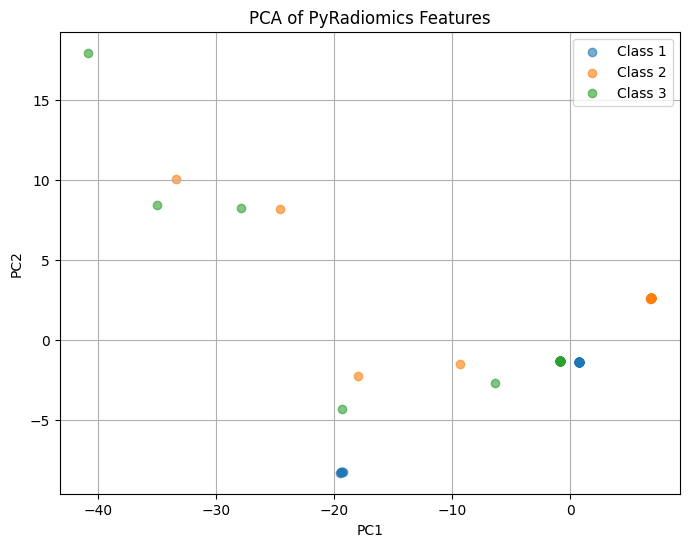

In [ ]:
# ========================
# Apply PCA to ResNet Features
# ========================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Applying PCA to extracted features...")

# Standardize features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
n_components = 50  # Can adjust based on desired variance
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features_scaled)

# Calculate explained variance
explained_var = pca.explained_variance_ratio_.sum()

print(f"
Original features: {features.shape}")
print(f"PCA features: {features_pca.shape}")
print(f"Explained variance: {explained_var:.4f} ({explained_var*100:.2f}%)")
print(f"
Top 5 components explain: {pca.explained_variance_ratio_[:5].sum():.4f}")


In [ ]:
### Combine Features

# Combine along feature axis
combined_features = np.concatenate((features_np, radiomics_np), axis=1)

# Scale & Apply PCA or Classification
combined_scaled = StandardScaler().fit_transform(combined_features)
combined_pca = PCA(n_components=2).fit_transform(combined_scaled)

# Optional: re-train classifier with combined features


In [ ]:
# Assuming you're looping through a dataloader
all_labels = []
for _, labels_batch in dataloader:
    all_labels.extend(labels_batch.numpy())  # or labels_batch.tolist() if it's a tensor

labels = np.array(all_labels)
print("Fixed labels shape:", labels.shape)  # should be (150,)



print("CNN feature shape:", features_np.shape)
print("Radiomic feature shape:", radiomics_np.shape)
print("Labels length:", len(labels))


Fixed labels shape: (150,)
CNN feature shape: (150, 64)
Radiomic feature shape: (150, 93)
Labels length: 150


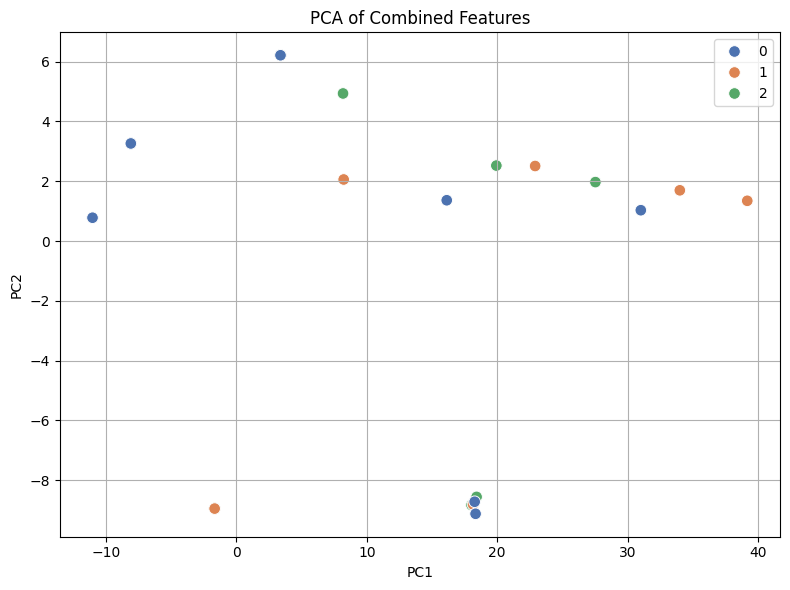

In [ ]:
import seaborn as sns


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=combined_pca[:, 0],
    y=combined_pca[:, 1],
    hue=labels,
    palette='deep',
    s=70
)
plt.title("PCA of Combined Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
### Classifier to compare DL, radiomics, and fused features
# Use same split for fair comparison
X_cnn = features_np
X_radio = radiomics_np
y = labels_np

X_train_cnn, X_test_cnn, y_train, y_test = train_test_split(X_cnn, y, test_size=0.3, random_state=42, stratify=y)
X_train_radio, X_test_radio, _, _ = train_test_split(X_radio, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
### CNN only classifier
clf_cnn = LogisticRegression(max_iter=1000)
clf_cnn.fit(X_train_cnn, y_train)
y_pred_cnn = clf_cnn.predict(X_test_cnn)

print("CNN-Only Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))


CNN-Only Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
### Radiomics-only classifier
clf_radio = LogisticRegression(max_iter=1000)
clf_radio.fit(X_train_radio, y_train)
y_pred_radio = clf_radio.predict(X_test_radio)

print("Radiomics-Only Accuracy:", accuracy_score(y_test, y_pred_radio))
print(classification_report(y_test, y_pred_radio))


Radiomics-Only Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.87      0.90        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
### Combined Features
X_combined = np.concatenate((X_cnn, X_radio), axis=1)
X_train_comb, X_test_comb, _, _ = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

clf_comb = LogisticRegression(max_iter=1000)
clf_comb.fit(X_train_comb, y_train)
y_pred_comb = clf_comb.predict(X_test_comb)

print("Combined Features Accuracy (No Dim Red):", accuracy_score(y_test, y_pred_comb))
print(classification_report(y_test, y_pred_comb))


Combined Features Accuracy (No Dim Red): 0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.93      0.87      0.90        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
### Alternative: With dimensionality reduction before fusion
# Standardize
scaler_cnn = StandardScaler()
scaler_radio = StandardScaler()

X_cnn_scaled = scaler_cnn.fit_transform(X_cnn)
X_radio_scaled = scaler_radio.fit_transform(X_radio)

# PCA to retain 95% variance
pca_cnn = PCA(n_components=0.95)
pca_radio = PCA(n_components=0.95)

X_cnn_pca = pca_cnn.fit_transform(X_cnn_scaled)
X_radio_pca = pca_radio.fit_transform(X_radio_scaled)

# Combine reduced features
X_comb_pca = np.concatenate((X_cnn_pca, X_radio_pca), axis=1)

# Split
X_train_pca, X_test_pca, _, _ = train_test_split(X_comb_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train classifier
clf_comb_pca = LogisticRegression(max_iter=1000)
clf_comb_pca.fit(X_train_pca, y_train)
y_pred_comb_pca = clf_comb_pca.predict(X_test_pca)

print("Combined Features Accuracy (With PCA):", accuracy_score(y_test, y_pred_comb_pca))
print(classification_report(y_test, y_pred_comb_pca))


Combined Features Accuracy (With PCA): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 1. Visualize CNN Features

1. CNN Features: Use Activation Maps or Grad-CAM
To visualize what a CNN “focuses” on:

🔹 Option A: Feature (Activation) Maps
Extract feature maps from early/mid layers of your CNN.

Use hooks (register_forward_hook) or model introspection to grab outputs.

Visualize them as grayscale or heatmaps overlaid on the input image.

python
Copy
Edit
def hook_fn(module, input, output):
    activation_maps.append(output.detach().cpu())

layer = model.features[3]  # For example
layer.register_forward_hook(hook_fn)

_ = model(image_tensor.unsqueeze(0))

In [ ]:
# Option B: Grad-CAM (Class Activation Mapping)
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.0 MB/s e

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layer = model.layer4[-1]  # Final conv layer
cam = GradCAM(model=model, target_layers=[target_layer])
grayscale_cam = cam(input_tensor=image_tensor.unsqueeze(0))[0, :]
visualization = show_cam_on_image(original_image, grayscale_cam)


AttributeError: 'SimpleCNN' object has no attribute 'layer4'

tensor([[-2.1317, -3.9469,  7.8645]])


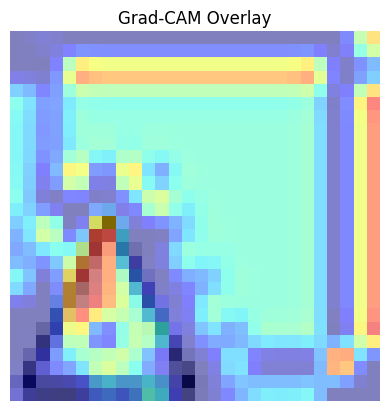

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from PIL import Image

# -----------------------
# Grad-CAM Helper
# -----------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self, input_tensor, target_class):
        self.model.zero_grad()
        output, _ = self.model(input_tensor)
        class_score = output[:, target_class]
        class_score.backward()

        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations.squeeze(0)

        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        heatmap = torch.mean(activations, dim=0).cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        return heatmap

# -----------------------
# Visualization Utility
# -----------------------
def show_gradcam_on_image(img_tensor, heatmap):
    img = img_tensor.squeeze().cpu().numpy()
    heatmap_resized = np.uint8(255 * heatmap)
    heatmap_resized = Image.fromarray(heatmap_resized).resize((img.shape[1], img.shape[0]))
    heatmap_resized = np.array(heatmap_resized)

    plt.imshow(img, cmap='gray')
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.title('Grad-CAM Overlay')
    plt.show()

# -----------------------
# Run Grad-CAM on an Image
# -----------------------
# Load a sample image from dataset
model.eval()
sample_img, label = dataset[100]
input_tensor = sample_img.unsqueeze(0).to(device)

# Pick target class (e.g., predicted class)
with torch.no_grad():
    output, _ = model(input_tensor)
    print(output)
    pred_class = output.argmax(dim=1).item()

# Hook into final conv layer (your last Conv2d in features)
target_layer = model.features[6]  # Conv2d(32, 64, ...)

# Run Grad-CAM
gradcam = GradCAM(model, target_layer)
heatmap = gradcam.generate_cam(input_tensor, target_class=pred_class)

# Visualize
show_gradcam_on_image(sample_img, heatmap)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision.transforms as transforms

def show_gradcam_per_class(model, target_layer, image_path, class_names=None, resize_to=(224, 224)):
    """
    Displays Grad-CAM heatmaps for each class for a single input image.
    """

    model.eval()

    # Load image
    image = Image.open(image_path).convert('RGB')
    image_resized = image.resize(resize_to)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])
    input_tensor = transform(image_resized).unsqueeze(0).to(device)

    fig, axs = plt.subplots(1, model.fc.out_features, figsize=(5 * model.fc.out_features, 5))

    for class_idx in range(model.fc.out_features):

        # Grad-CAM setup
        gradients = []
        activations = []

        def save_gradient(grad):
            gradients.append(grad)

        def forward_hook(module, input, output):
            activations.append(output)
            output.register_hook(save_gradient)

        handle = target_layer.register_forward_hook(forward_hook)

        # Forward + backward
        model.zero_grad()
        output = model(input_tensor)
        model_output = output[0, class_idx]
        model_output.backward()

        # Get gradients and activations
        gradient = gradients[0].squeeze().cpu().numpy()
        activation = activations[0].squeeze().cpu().numpy()

        weights = np.mean(gradient, axis=(1, 2))  # GAP over spatial dims
        cam = np.zeros(activation.shape[1:])

        for i, w in enumerate(weights):
            cam += w * activation[i]

        # Postprocess CAM
        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, resize_to)
        cam -= cam.min()
        cam /= cam.max()

        # Overlay CAM on original image
        img_np = np.array(image_resized).astype(np.float32) / 255.0
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
        heatmap = heatmap.astype(np.float32) / 255.0
        overlay = heatmap * 0.4 + img_np * 0.6

        # Show image
        axs[class_idx].imshow(overlay)
        axs[class_idx].set_title(f"Class {class_idx}" if not class_names else class_names[class_idx])
        axs[class_idx].axis('off')

        handle.remove()

    plt.tight_layout()
    plt.show()


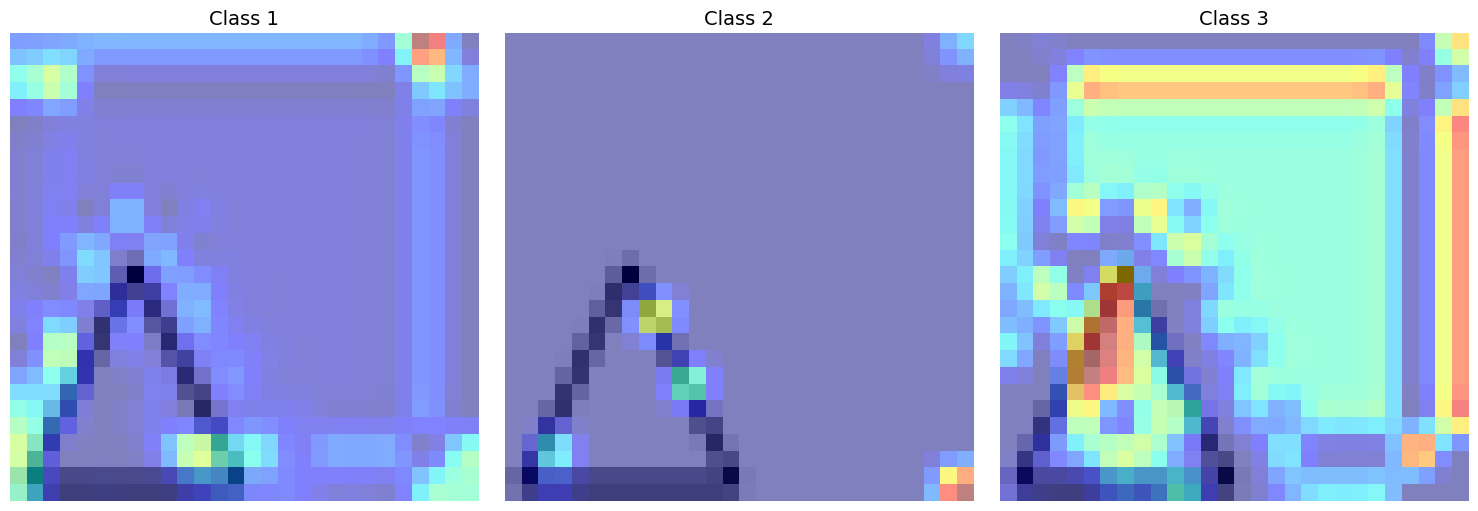

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from PIL import Image

# -----------------------
# Grad-CAM Helper
# -----------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self, input_tensor, target_class):
        self.model.zero_grad()
        output, _ = self.model(input_tensor)
        class_score = output[:, target_class]
        class_score.backward(retain_graph=True)

        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations.squeeze(0)

        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        heatmap = torch.mean(activations, dim=0).cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap) + 1e-6  # Prevent division by 0
        return heatmap

# -----------------------
# Grad-CAM Display for All Classes
# -----------------------
def show_gradcam_all_classes(img_tensor, heatmaps, class_names=None):
    img = img_tensor.squeeze().cpu().numpy()
    fig, axes = plt.subplots(1, len(heatmaps), figsize=(5 * len(heatmaps), 5))

    if len(heatmaps) == 1:
        axes = [axes]

    for i, heatmap in enumerate(heatmaps):
        heatmap_resized = np.uint8(255 * heatmap)
        heatmap_resized = Image.fromarray(heatmap_resized).resize((img.shape[1], img.shape[0]))
        heatmap_resized = np.array(heatmap_resized)

        axes[i].imshow(img, cmap='gray')
        axes[i].imshow(heatmap_resized, cmap='jet', alpha=0.5)
        axes[i].axis('off')
        title = f"Class {i}" if class_names is None else class_names[i]
        axes[i].set_title(title, fontsize=14)

    plt.tight_layout()
    plt.show()

# -----------------------
# Run Grad-CAM on an Image for All Classes
# -----------------------
# Load a sample image from dataset

# which image?
im_sel = 100


model.eval()
sample_img, label = dataset[im_sel]
input_tensor = sample_img.unsqueeze(0).to(device)

# Hook into final conv layer
target_layer = model.features[6]
gradcam = GradCAM(model, target_layer)

# Generate Grad-CAM heatmaps for each class
num_classes = 3 #model.classifier.out_features  # e.g., 3
heatmaps = [gradcam.generate_cam(input_tensor, target_class=i) for i in range(num_classes)]

# Optional: Define class names if available
class_names = ['Class 1', 'Class 2', 'Class 3']  # Adjust as needed

# Display all heatmaps side-by-side
show_gradcam_all_classes(sample_img, heatmaps, class_names=class_names)


In [ ]:
# 2. Visualize Radiomics Features

/tmp/ipython-input-44-1939517536.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_matrix[i, j], _ = spearmanr(radiomic_features_std[:, i], cnn_features_std[:, j])


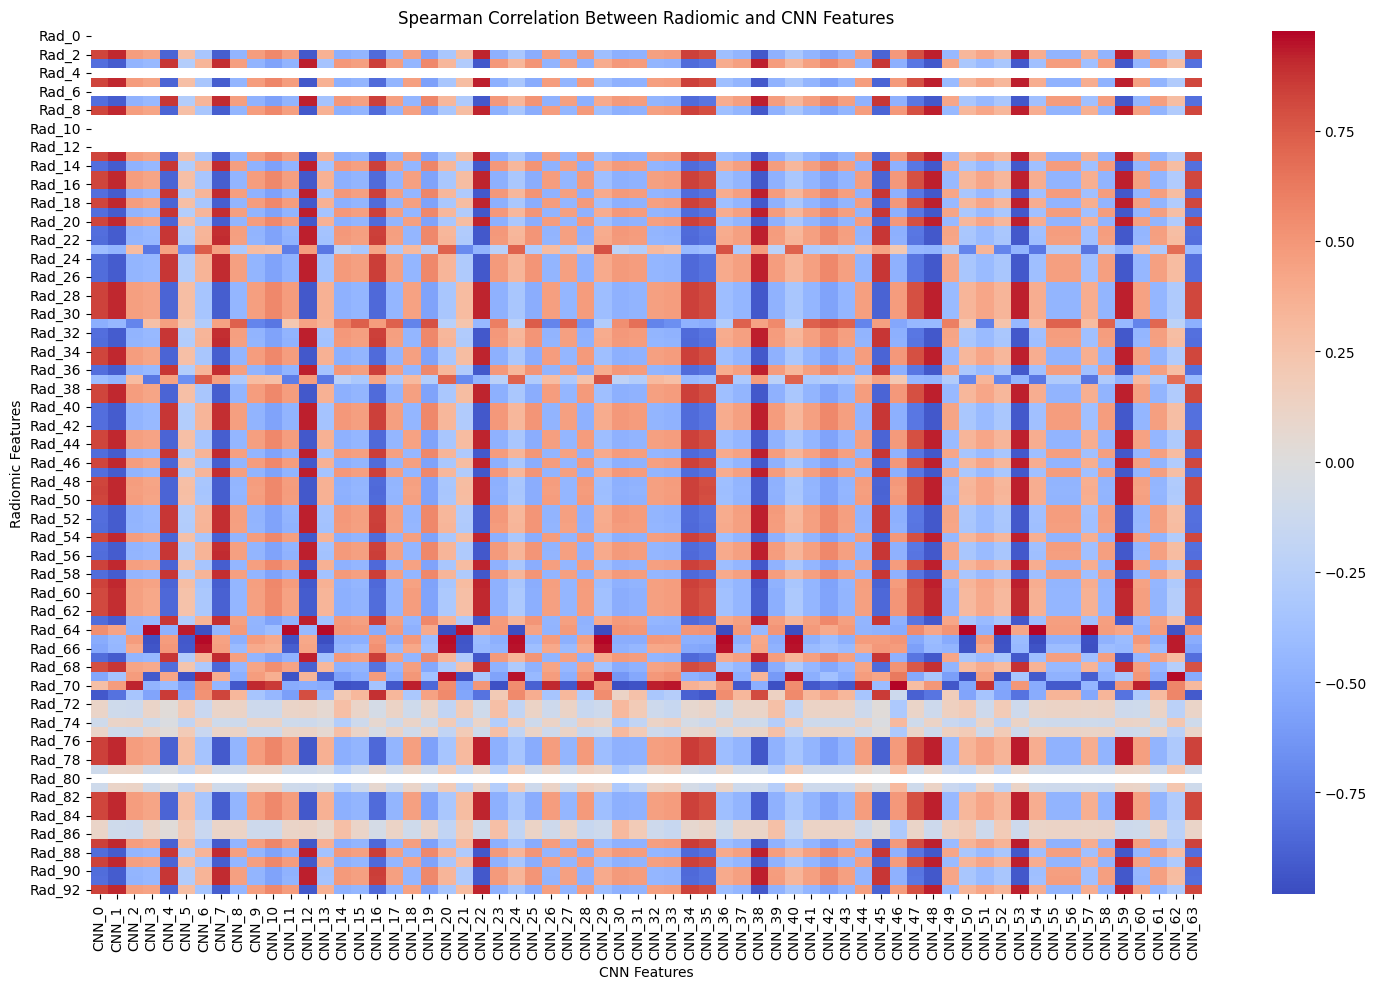

In [ ]:
from sklearn.preprocessing import StandardScaler

radiomic_features_std = StandardScaler().fit_transform(X_radio)
cnn_features_std = StandardScaler().fit_transform(X_cnn)



import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Output will be a (N_radiomic_features x N_cnn_features) correlation matrix
corr_matrix = np.zeros((radiomic_features_std.shape[1], cnn_features_std.shape[1]))

for i in range(radiomic_features_std.shape[1]):
    for j in range(cnn_features_std.shape[1]):
        corr_matrix[i, j], _ = spearmanr(radiomic_features_std[:, i], cnn_features_std[:, j])

# Convert to DataFrame for easier handling
corr_df = pd.DataFrame(
    corr_matrix,
    index=[f"Rad_{i}" for i in range(radiomic_features_std.shape[1])],
    columns=[f"CNN_{j}" for j in range(cnn_features_std.shape[1])]
)



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Between Radiomic and CNN Features")
plt.xlabel("CNN Features")
plt.ylabel("Radiomic Features")
plt.tight_layout()
plt.show()


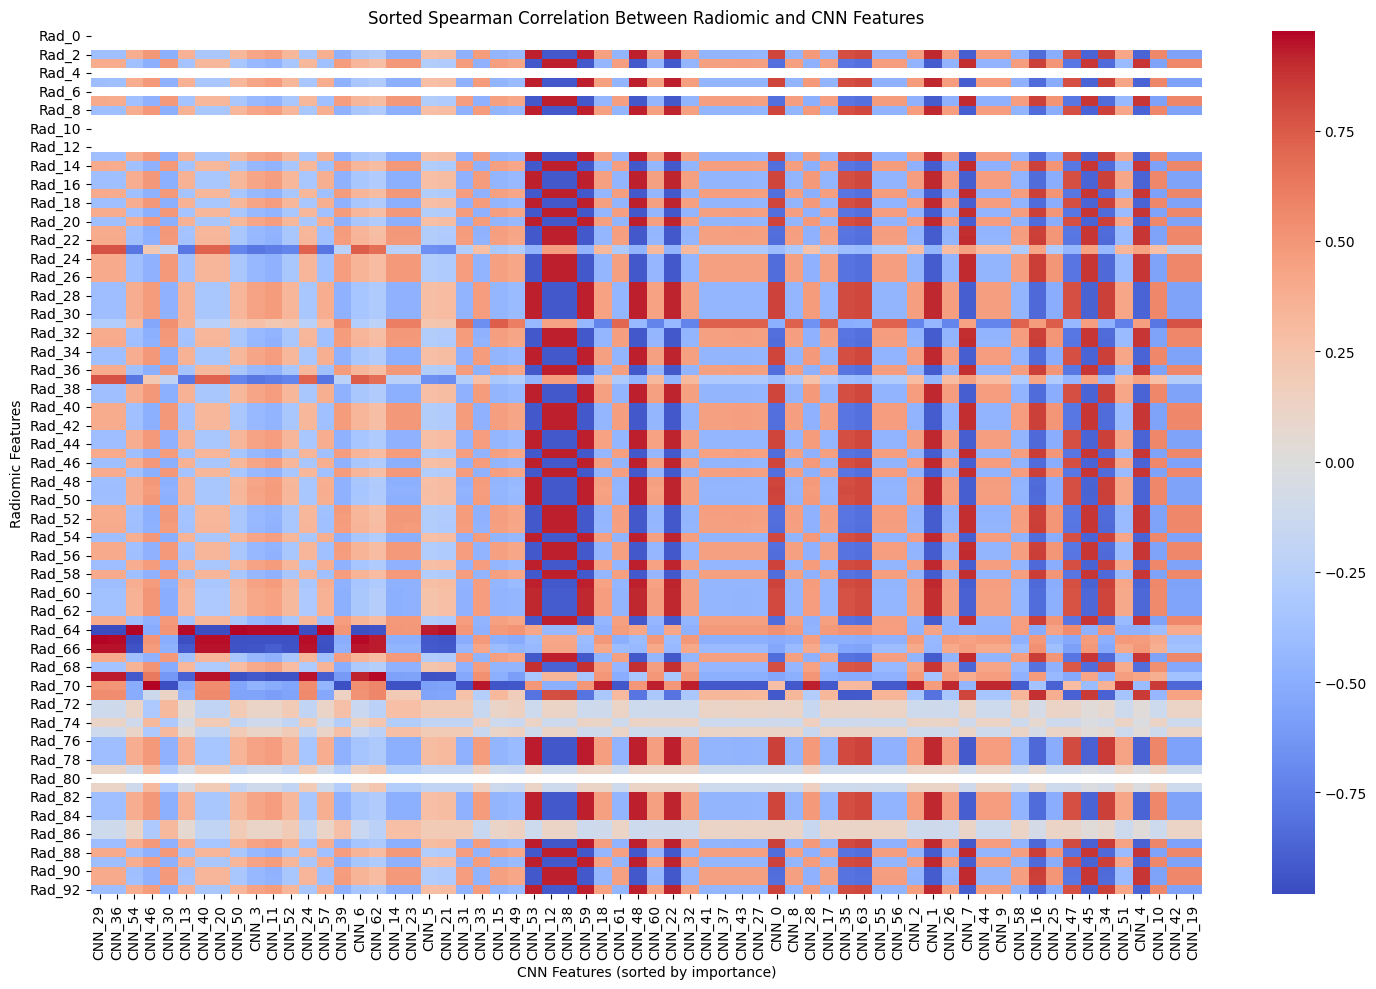

In [ ]:
# 1. Compute importance (e.g., max absolute correlation per CNN feature)
cnn_importance = corr_df.abs().max(axis=0)  # or use `.mean(axis=0)` for mean importance

# 2. Sort the CNN features by importance
sorted_cnn = cnn_importance.sort_values(ascending=False).index.tolist()

# 3. Reorder the DataFrame columns
corr_df_sorted = corr_df[sorted_cnn]


plt.figure(figsize=(15, 10))
sns.heatmap(corr_df_sorted, cmap='coolwarm', center=0)
plt.title("Sorted Spearman Correlation Between Radiomic and CNN Features")
plt.xlabel("CNN Features (sorted by importance)")
plt.ylabel("Radiomic Features")
plt.tight_layout()
plt.show()


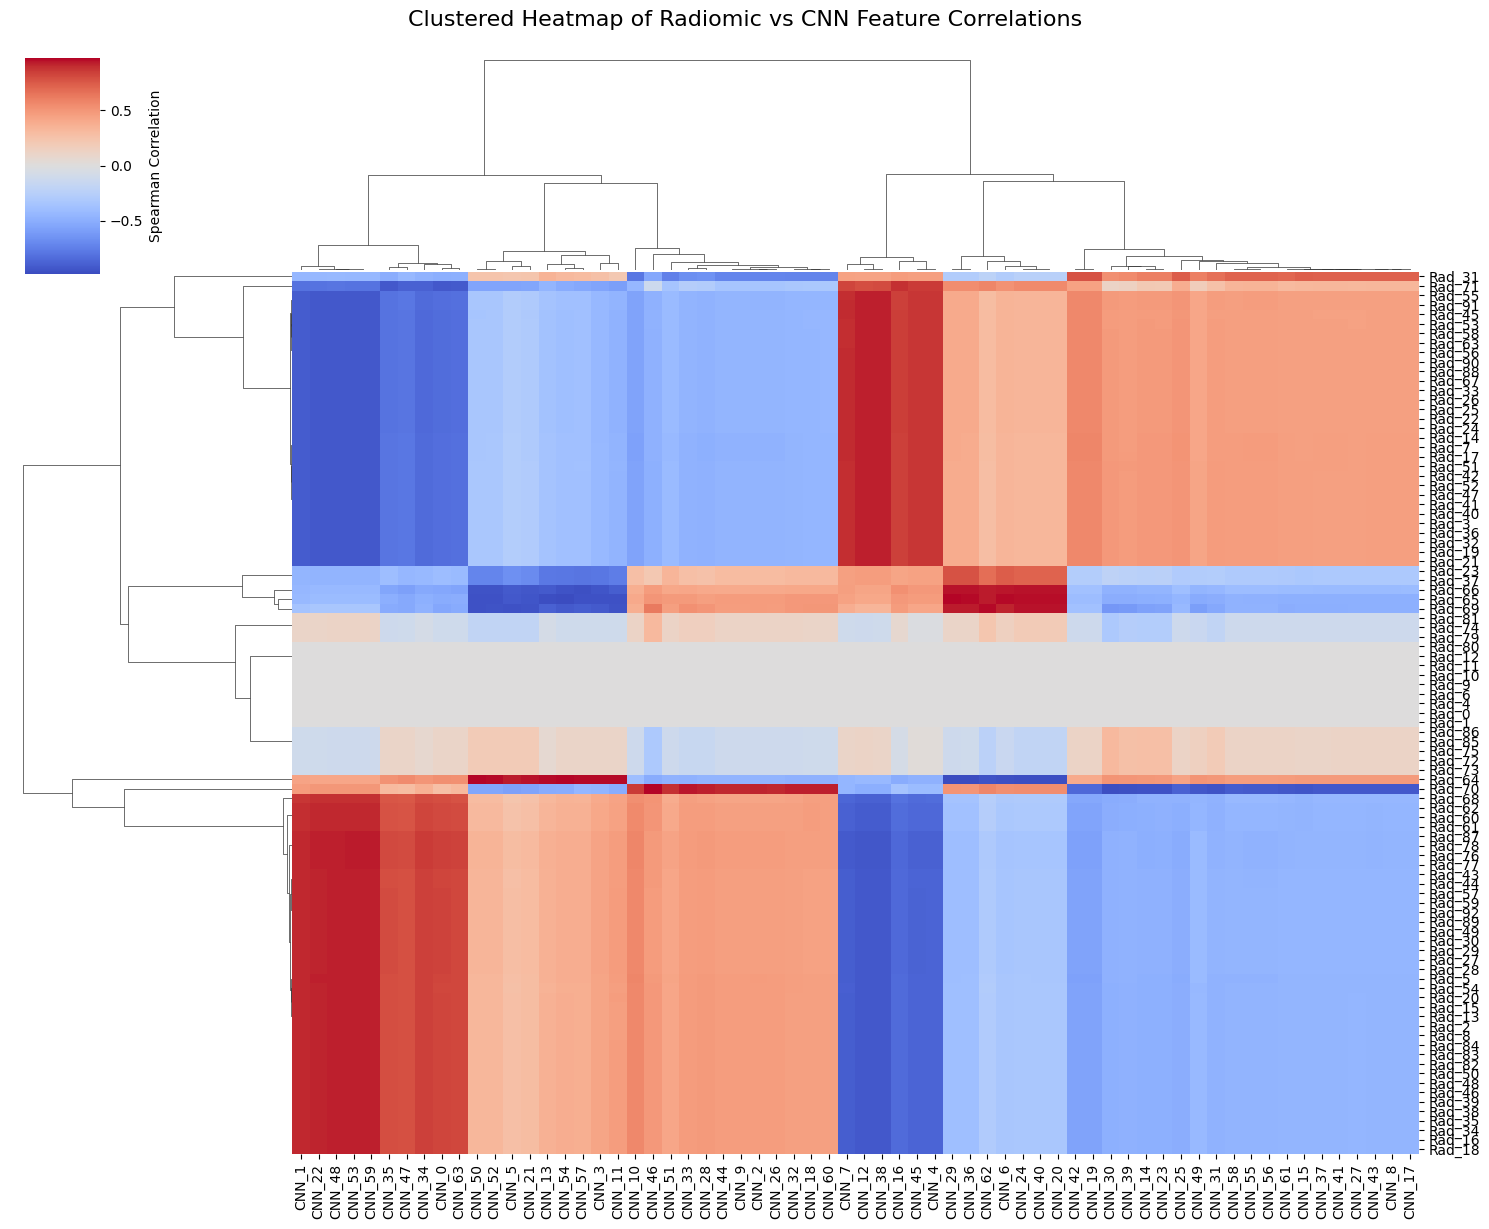

In [ ]:

# 1. Compute feature importance (e.g., max absolute correlation)
cnn_importance = corr_df.abs().max(axis=0)

# 2. Sort CNN features by importance
sorted_cnn = cnn_importance.sort_values(ascending=False).index.tolist()
corr_df_sorted = corr_df[sorted_cnn].fillna(0) # Fill NaN values with 0

# 3. Plot clustered heatmap
sns.clustermap(
    corr_df_sorted,
    cmap="coolwarm",
    center=0,
    figsize=(15, 12),
    row_cluster=True,
    col_cluster=True,
    cbar_kws={"label": "Spearman Correlation"},
    xticklabels=True,
    yticklabels=True
)

plt.suptitle("Clustered Heatmap of Radiomic vs CNN Feature Correlations", fontsize=16, y=1.02)
plt.show()

Model Output (logits): tensor([[ 4.3679, -8.2453,  6.0844]])
--------------- tensor([[ 4.3679, -8.2453,  6.0844]])
Predicted Class: 2
Actual Label: 2


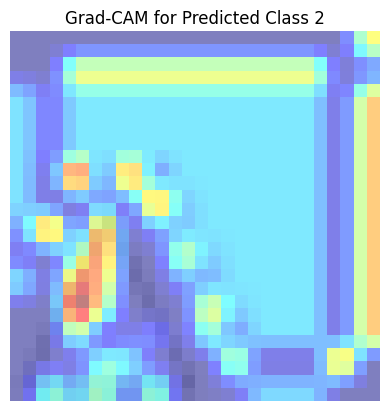

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget # Import ClassifierOutputTarget
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load a sample image from dataset
model.eval()
sample_img, label = dataset[100]

# Convert the grayscale tensor to a PIL Image and then to a numpy array
# The library's preprocess_image function expects a numpy image
original_img_pil = transforms.ToPILImage()(sample_img.cpu())
original_img_np = np.array(original_img_pil)

# Preprocess the image for the model
# The preprocess_image function from the library handles normalization and adding batch dimension
# Need to adjust the mean and std to match the grayscale normalization used in the dataset
rgb_img = original_img_pil.convert('RGB') # Convert to RGB as preprocess_image expects 3 channels initially
rgb_img_np = np.array(rgb_img)
# Adjust mean and std to match grayscale normalization [0.5] and apply to 3 channels
input_tensor = preprocess_image(rgb_img_np, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# Since our model is grayscale, we need to convert the input tensor back to 1 channel
# We can take the first channel (since all three are the same after applying grayscale mean/std)
# and ensure it's the correct shape [1, 1, H, W] for the model
input_tensor = input_tensor[:, 0:1, :, :] # Keep only the first channel


# Pick target class (e.g., predicted class)
with torch.no_grad():
    output, _ = model(input_tensor.to(device))
    print(f"Model Output (logits): {output}")
    print("---------------", output)
    pred_class = output.argmax(dim=1).item()
    print(f"Predicted Class: {pred_class}")
    print(f"Actual Label: {label}")

# Define target layers (list of layers)
# For your SimpleCNN, model.features[6] is the last Conv2d layer
target_layers = [model.features[6]]

# Construct the GradCAM object with the model and target layers
cam = GradCAM(model=model, target_layers=target_layers)

# Generate the heatmap
# Pass the input tensor and the target class using ClassifierOutputTarget
grayscale_cam = cam(input_tensor=input_tensor.to(device), targets=[ClassifierOutputTarget(pred_class)])

# In our case, there's only one image in the batch, so we can take the first element
grayscale_cam = grayscale_cam[0, :]

# Visualize the heatmap
# The show_cam_on_image function expects an RGB numpy image and the grayscale heatmap
# We need to convert our grayscale original_img_np to RGB for visualization purposes
original_img_rgb = cv2.cvtColor(original_img_np, cv2.COLOR_GRAY2RGB)
visualization = show_cam_on_image(original_img_rgb.astype(np.float32) / 255., grayscale_cam, use_rgb=True)

# Display the visualization
plt.imshow(visualization)
plt.axis('off')
plt.title(f'Grad-CAM for Predicted Class {pred_class}')
plt.show()

In [ ]:
# Imaging-Genomics Integration Pipeline — Section 2: Feature Fusion and PCA + Clustering + CAM Projection

This module performs the following:
- Fuses CNN, radiomic, and gene expression features.
- Applies dimensionality reduction (PCA) and clustering.
- Allows interactive selection of feature groups.
- Projects Class Activation Maps (CAMs) based on selected feature groups.

```python
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torchvision import models
from torchvision.transforms import ToTensor, Normalize, Compose
import cv2

# -----------------------------
# Step 1: Load Fused Feature Sets
# -----------------------------
# fused_features: [n_samples x (CNN+Radiomic+Gene)]
# labels: experimental group labels
# images: original histology or radiology images

# Example variables (replace with your actual data)
fused_features = np.load('fused_features.npy')  # shape: (n_samples, n_features)
labels = pd.read_csv('sample_labels.csv')['group'].values  # shape: (n_samples,)
images = np.load('images.npy')  # shape: (n_samples, H, W, 3)

# -----------------------------
# Step 2: Standardize and Apply PCA
# -----------------------------
scaler = StandardScaler()
fused_std = scaler.fit_transform(fused_features)

pca = PCA(n_components=2)
fused_pca = pca.fit_transform(fused_std)

# -----------------------------
# Step 3: Clustering
# -----------------------------
k = 4  # You can set this based on silhouette analysis
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(fused_pca)

# -----------------------------
# Step 4: Visualization
# -----------------------------
df_plot = pd.DataFrame({
    'PC1': fused_pca[:, 0],
    'PC2': fused_pca[:, 1],
    'Cluster': clusters,
    'Group': labels
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_plot, x='PC1', y='PC2', hue='Cluster', style='Group', palette='tab10')
plt.title('PCA of Fused Features with Clustering and Experimental Groups')
plt.show()

# -----------------------------
# Step 5: CAM Projection Tool
# -----------------------------
# Select cluster, find associated features, and visualize CAM

# Helper function: Get top contributing features to a cluster centroid
def get_top_features_per_cluster(cluster_id, num_features=10):
    cluster_center = kmeans.cluster_centers_[cluster_id]
    top_indices = np.argsort(np.abs(cluster_center))[::-1][:num_features]
    return top_indices

# Helper function: Apply CAM using selected CNN features
class SimpleCAM:
    def __init__(self, model, target_layer):
        self.model = model.eval()
        self.target_layer = target_layer
        self.activations = None
        self.gradients = None

        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_cam(self, input_tensor, class_idx=None):
        output = self.model(input_tensor.unsqueeze(0))
        if class_idx is None:
            class_idx = output.argmax().item()

        self.model.zero_grad()
        class_score = output[0, class_idx]
        class_score.backward()

        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations.squeeze()

        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        cam = torch.sum(activations, dim=0).cpu().numpy()
        cam = np.maximum(cam, 0)
        cam = cam / np.max(cam)
        return cam

# Example CAM usage
# Load pretrained model (adjust to your model)
cnn_model = models.resnet18(pretrained=True)
target_layer = cnn_model.layer4[1].conv2  # pick a deep layer
cam_generator = SimpleCAM(cnn_model, target_layer)

# Select an image (e.g., first image in a given cluster)
cluster_idx = 0  # change as desired
sample_idx = np.where(clusters == cluster_idx)[0][0]
image_tensor = ToTensor()(images[sample_idx])
image_tensor = Normalize(mean=[0.5]*3, std=[0.5]*3)(image_tensor)

# Generate CAM and visualize
cam = cam_generator.generate_cam(image_tensor)
original_img = images[sample_idx]
cam_resized = cv2.resize(cam, (original_img.shape[1], original_img.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
combined = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

plt.imshow(combined)
plt.title(f'Class Activation Map (Cluster {cluster_idx})')
plt.axis('off')
plt.show()
```

---

### 📌 Notes:
- You can adapt the number of principal components or clusters using silhouette score.
- `get_top_features_per_cluster` helps interpret which fused features contribute most to each cluster.
- The `SimpleCAM` class provides basic Grad-CAM-style interpretability for CNNs, but more advanced options (e.g., GradCAM++) can be substituted.
- For gene-level interpretation, link `top_indices` to genes when they fall in the gene section of your fused features.


In [ ]:
# Integrated Genomics-Histology Imaging Pipeline

This codebase outlines a modular and extensible pipeline to combine histology image features (CNN and radiomics), microCT data, and bulk RNA-seq gene expression for comprehensive analysis and interpretation of osteonecrosis of the femoral head (ONFH) and treatment effects.

We cover several key objectives:
1. Feature fusion of CNN and radiomics data.
2. Clustering and dimensionality reduction with gene expression.
3. Gene inference from image data.
4. CAM (Class Activation Map) generation from selected fused feature groups.
5. Pseudo-spatial gene expression approximation.

---

## STEP 1: Load and Preprocess Data
```python
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns

# Load features and metadata
cnn_features = np.load("cnn_features.npy")       # shape (n_samples, cnn_dim)
radiomics_features = np.load("radiomics_features.npy") # shape (n_samples, rad_dim)
gene_expression = pd.read_csv("bulk_rna_seq.csv", index_col=0)  # rows = samples, cols = genes
metadata = pd.read_csv("sample_metadata.csv")    # includes sample IDs and groups

# Sanity check
assert cnn_features.shape[0] == radiomics_features.shape[0] == gene_expression.shape[0] == metadata.shape[0]

# Normalize all feature types
scaler = StandardScaler()
cnn_scaled = scaler.fit_transform(cnn_features)
radiomics_scaled = scaler.fit_transform(radiomics_features)
gene_scaled = scaler.fit_transform(gene_expression.values)
```

---

## STEP 2: Feature Fusion and Clustering with Gene Expression
```python
# Fuse CNN + Radiomics + Gene Expression features
fused_features = np.concatenate([cnn_scaled, radiomics_scaled, gene_scaled], axis=1)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
fused_pca = pca.fit_transform(fused_features)

# Cluster within experimental groups
metadata['Group'] = metadata['Group'].astype(str)
for group in metadata['Group'].unique():
    idx = metadata['Group'] == group
    kmeans = KMeans(n_clusters=3, random_state=42).fit(fused_features[idx])
    metadata.loc[idx, 'Cluster'] = kmeans.labels_

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=fused_pca[:, 0], y=fused_pca[:, 1],
    hue=metadata['Cluster'].astype(str), style=metadata['Group'], palette="tab10"
)
plt.title("Fused Feature PCA with Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
```

---

## STEP 3: Gene Inference from Image Features
```python
def infer_gene_expression(image_features, genes, model_type='ridge', alpha=1.0):
    inferred_results = {}
    for gene in genes:
        y = gene_expression[gene].values
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        else:
            raise ValueError("Only ridge regression is currently supported.")

        model.fit(image_features, y)
        inferred_results[gene] = {
            'coef': model.coef_,
            'r2': model.score(image_features, y)
        }
    return inferred_results

# Example: Predict top 5 highly variable genes
gene_vars = gene_expression.var().sort_values(ascending=False)
top_genes = gene_vars.head(5).index.tolist()
results = infer_gene_expression(np.concatenate([cnn_scaled, radiomics_scaled], axis=1), top_genes)
```

---

## STEP 4: CAM Projection Using Fused Features
```python
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from matplotlib import cm

# Assume you have trained CNN model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))
        )

    def forward(self, x):
        return self.features(x)

# Get activation maps for selected cluster or feature set
selected_feature_idx = np.where(metadata['Cluster'] == 0)[0]

# Placeholder images
images = [ToTensor()(plt.imread(f"img_{i}.png")) for i in selected_feature_idx]
model = CustomCNN()
model.eval()

for img_tensor in images:
    with torch.no_grad():
        activation = model(img_tensor.unsqueeze(0)).squeeze().numpy()
        heatmap = activation[0]  # example channel
        plt.imshow(heatmap, cmap='viridis')
        plt.title("CAM Heatmap")
        plt.colorbar()
        plt.show()
```

---

## STEP 5: Pseudo-Spatial Gene Expression Mapping
```python
# Use inferred gene model coefficients to generate pseudo-spatial maps
from skimage.transform import resize

def generate_pseudo_spatial_map(image_features, model_coef, img_shape=(224, 224)):
    spatial_map = np.dot(image_features, model_coef)
    return resize(spatial_map.reshape(int(np.sqrt(spatial_map.shape[0])), -1), img_shape)

# For a specific gene
gene = top_genes[0]
coef = results[gene]['coef']
spatial_map = generate_pseudo_spatial_map(np.concatenate([cnn_scaled, radiomics_scaled], axis=1), coef)

plt.imshow(spatial_map, cmap='plasma')
plt.title(f"Pseudo-Spatial Map of {gene}")
plt.axis('off')
plt.colorbar()
plt.show()
```

---

## Future Extensions
- Integration with spatial transcriptomics when available.
- Deep learning models for direct image-to-gene prediction.
- Clinical outcome prediction from fused features.

Let me know if you'd like an interactive UI, model saving/serving, or batch processing modules added.


In [ ]:
### Step 1: Load and Preprocess Data

```python
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example placeholders - replace with actual data
cnn_features = pd.read_csv("cnn_features.csv", index_col=0)
radiomic_features = pd.read_csv("radiomic_features.csv", index_col=0)
gene_expression = pd.read_csv("gene_expression.csv", index_col=0)
labels = pd.read_csv("labels.csv", index_col=0)  # Assume format: sample_id, label

# Merge features
fused_features = pd.concat([cnn_features, radiomic_features, gene_expression], axis=1)

# Normalize
scaler = StandardScaler()
fused_scaled = scaler.fit_transform(fused_features)

# Save normalized version for future steps
fused_scaled_df = pd.DataFrame(fused_scaled, index=fused_features.index, columns=fused_features.columns)
```

---

### Step 2: PCA + Clustering for Subgroups

```python
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 2D PCA for visualization
pca = PCA(n_components=2)
fused_pca = pca.fit_transform(fused_scaled)
fused_pca_df = pd.DataFrame(fused_pca, columns=["PC1", "PC2"])
fused_pca_df["Label"] = labels.values

# KMeans clustering to find subgroups within each experimental group
for group in fused_pca_df["Label"].unique():
    subset = fused_scaled_df[labels["Label"] == group]
    kmeans = KMeans(n_clusters=3, random_state=42).fit(subset)
    fused_pca_df.loc[fused_pca_df["Label"] == group, "Cluster"] = kmeans.labels_

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=fused_pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    style="Label",
    palette="tab10",
    s=80
)
plt.title("Fused Features PCA + Clustering")
plt.show()
```

---

### Step 3: Cluster Feature Sets + Class Activation Mapping (CAM)

```python
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster features using cosine similarity
similarity = cosine_similarity(fused_scaled_df.T)
linkage = sch.linkage(similarity, method='ward')

# Dendrogram and heatmap
sns.clustermap(
    similarity,
    row_linkage=linkage,
    col_linkage=linkage,
    xticklabels=fused_scaled_df.columns,
    yticklabels=fused_scaled_df.columns,
    cmap="coolwarm"
)
plt.title("Feature Similarity Clustering")
plt.show()
```

> After this, you would use the selected clusters to mask/weight CNN feature maps (via CAM methods like Grad-CAM or Score-CAM) for interpretation. Let me know if you want that implemented for a specific framework like PyTorch.

---

### Step 4: Inference of Gene Expression from Images

```python
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Gene prediction setup
X = pd.concat([cnn_features, radiomic_features], axis=1)
y = gene_expression

predicted_genes = {}
for gene in y.columns:
    y_gene = y[gene]
    X_train, X_test, y_train, y_test = train_test_split(X, y_gene, test_size=0.2, random_state=42)
    model = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    if score > 0.5:
        predicted_genes[gene] = (model, score)

# Save results
for gene, (model, score) in predicted_genes.items():
    print(f"Gene: {gene}, R2: {score:.2f}")
```

---

### Step 5: Pseudo-Spatial Gene Expression (Prototype)

```python
import matplotlib.pyplot as plt
import numpy as np

# Example CAM overlay - pseudo spatial map per predicted gene (mockup)

# Assume you have image grid (H x W), and model can provide per-patch CNN + Radiomic features
# For now, mockup a grid and assign predictions to patches

h, w = 16, 16
heatmap = np.random.rand(h, w)  # Placeholder

plt.imshow(heatmap, cmap="viridis")
plt.colorbar(label="Expression Level")
plt.title("Pseudo-Spatial Gene Expression")
plt.axis("off")
plt.show()
```

> For real images, this step would involve mapping each patch's fused features to a gene expression prediction using the trained models from Step 4, then projecting onto the 2D image grid.

---

Would you like me to create helper functions and package this into reusable modules?


In [ ]:
### 4. Project Class Activation Maps (CAMs) for Fused Feature Groups

```python
import cv2
import numpy as np
import torch
from torchvision import models, transforms
from torch.nn import functional as F
from PIL import Image

# Define a simple Grad-CAM extractor for visualization
def generate_gradcam(model, image_tensor, target_layer):
    model.eval()
    gradients = []
    activations = []

    def save_gradient(grad):
        gradients.append(grad)

    def forward_hook(module, input, output):
        activations.append(output)
        output.register_hook(save_gradient)

    handle = target_layer.register_forward_hook(forward_hook)

    # Forward pass
    output = model(image_tensor.unsqueeze(0))
    class_idx = output.argmax(dim=1).item()

    # Backward pass
    model.zero_grad()
    class_score = output[0, class_idx]
    class_score.backward()

    # Compute Grad-CAM
    gradient = gradients[0][0]
    activation = activations[0][0]
    weights = gradient.mean(dim=(1, 2))
    cam = torch.zeros(activation.shape[1:], dtype=torch.float32)

    for i, w in enumerate(weights):
        cam += w * activation[i, :, :]

    cam = F.relu(cam)
    cam -= cam.min()
    cam /= cam.max()
    cam_np = cam.detach().cpu().numpy()

    handle.remove()
    return cam_np, class_idx

# Example usage with a pretrained ResNet for CAM overlay
model = models.resnet18(pretrained=True)
target_layer = model.layer4[1].conv2

# Image preparation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Assuming `selected_image_path` is the path to a chosen image
image_pil = Image.open(selected_image_path).convert("RGB")
image_tensor = transform(image_pil)

cam, predicted_class = generate_gradcam(model, image_tensor, target_layer)

# Overlay CAM on original image
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
original_image = np.array(image_pil.resize((224, 224)))
overlay = 0.5 * heatmap + 0.5 * original_image

# Display
plt.imshow(overlay.astype(np.uint8))
plt.title(f"Grad-CAM for class {predicted_class}")
plt.axis('off')
plt.show()
```

---

### 5. Inference of Gene Expression from Image Features

We train a regression model (e.g., Ridge, Random Forest, or a Neural Network) to predict gene expression values from fused features:

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define gene subset of interest
genes_to_predict = ['GeneA', 'GeneB', 'GeneC']

for gene in genes_to_predict:
    y = gene_expression_df[gene].values
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(model, fused_features_df.values, y, scoring='r2', cv=5)
    print(f"R^2 for {gene}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

    model.fit(fused_features_df.values, y)
    gene_expression_df[f"{gene}_predicted"] = model.predict(fused_features_df.values)
```

---

### 6. Pseudo-Spatial Gene Expression (Optional Advanced Step)

If you want to create a 2D pseudo-spatial map of predicted gene expression for visualization, you can do the following:

```python
# Predict spatial maps based on tiled image regions and features (simplified version)
tile_features = ...  # (N tiles × D features)
tile_coords = ...    # (N tiles × 2) xy coordinates of each tile

model = RandomForestRegressor(n_estimators=100)
model.fit(fused_features_df.values, gene_expression_df['GeneA'].values)

predicted_expression = model.predict(tile_features)

# Plot spatial gene map
plt.figure(figsize=(6, 6))
sc = plt.scatter(tile_coords[:, 0], tile_coords[:, 1], c=predicted_expression, cmap='viridis')
plt.colorbar(sc, label='Predicted Expression: GeneA')
plt.title("Pseudo-Spatial Gene Expression Map")
plt.axis('equal')
plt.gca().invert_yaxis()
plt.show()
```

---

This completes the full pipeline:
1. Feature fusion
2. Correlation with expression
3. Dimensionality reduction and clustering
4. Grad-CAM projection
5. Expression inference
6. Pseudo-spatial reconstruction

Let me know if you want to modularize this into classes or package format, or add saving/loading steps.


In [ ]:
import torch
import torch.nn.functional as F
from torchvision import models
from torch.autograd import Function
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Utility function: convert CAM to heatmap
def convert_to_heatmap(cam: np.ndarray) -> np.ndarray:
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam = np.uint8(255 * cam)
    return cv2.applyColorMap(cam, cv2.COLORMAP_JET)

# Hook for Grad-CAM
class GradCAM:
    def __init__(self, model: torch.nn.Module, target_layer: str):
        self.model = model.eval()
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        def save_gradients(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        def save_activations(module, input, output):
            self.activations = output

        for name, module in self.model.named_modules():
            if name == target_layer:
                module.register_forward_hook(save_activations)
                module.register_backward_hook(save_gradients)

    def __call__(self, image_tensor: torch.Tensor, target_class: int) -> np.ndarray:
        output = self.model(image_tensor)
        self.model.zero_grad()
        class_score = output[0, target_class]
        class_score.backward()

        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]

        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        heatmap = torch.mean(activations, dim=0).detach().cpu().numpy()
        return convert_to_heatmap(heatmap)


In [ ]:
def apply_gradcam_on_image(
    image: np.ndarray,
    model: torch.nn.Module,
    image_tensor: torch.Tensor,
    target_class: int,
    layer_name: str = "features.29"
):
    cam = GradCAM(model, target_layer=layer_name)
    heatmap = cam(image_tensor, target_class)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    superimposed_img = heatmap * 0.4 + cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return superimposed_img.astype(np.uint8)


In [ ]:
# Example usage
image_idx = 0
image_np = images_np[image_idx]         # Original RGB image
image_tensor = torch.tensor(image_np).unsqueeze(0).permute(0, 3, 1, 2).float() / 255.0

model = your_trained_cnn_model          # CNN trained with fused features
target_class = labels[image_idx]        # Ground-truth or predicted label

cam_image = apply_gradcam_on_image(image_np, model, image_tensor, target_class)

# Show result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cam_image, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM: Feature Cluster Activation")
plt.axis('off')
plt.show()


In [ ]:
# Build Multi-Output Regression Model

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

def train_gene_inference_model(X_features, y_gene_expr, model_type='rf'):
    """
    Trains a multi-output regressor to predict gene expression from image features.

    Parameters:
        X_features (np.array): Combined CNN + Radiomics features.
        y_gene_expr (pd.DataFrame): Gene expression matrix (samples x genes).
        model_type (str): 'rf' for Random Forest, 'linear' for Linear Regression, etc.

    Returns:
        model: Fitted regression model.
        predictions: Predicted expression values.
    """
    if model_type == 'rf':
        base_model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:
        raise NotImplementedError("Only 'rf' model_type is implemented.")

    model = MultiOutputRegressor(base_model)
    model.fit(X_features, y_gene_expr)
    predictions = model.predict(X_features)

    print("R2 Score:", r2_score(y_gene_expr, predictions, multioutput='variance_weighted'))
    print("MSE:", mean_squared_error(y_gene_expr, predictions))

    return model, predictions


In [ ]:
# Identify Top-Correlated Genes

from scipy.stats import spearmanr
import pandas as pd

def get_top_correlated_genes(X_features, y_gene_expr, top_k=20):
    """
    Calculates Spearman correlations between image features and each gene.

    Returns a dataframe of top correlated genes per feature.

    Parameters:
        X_features (np.array): CNN + Radiomics features.
        y_gene_expr (pd.DataFrame): Gene expression dataframe.

    Returns:
        top_genes_df (pd.DataFrame): Gene-feature correlation summary.
    """
    results = []
    for gene in y_gene_expr.columns:
        for i in range(X_features.shape[1]):
            corr, _ = spearmanr(X_features[:, i], y_gene_expr[gene])
            results.append({
                'feature_idx': i,
                'gene': gene,
                'correlation': corr
            })

    corr_df = pd.DataFrame(results)
    top_genes_df = (
        corr_df
        .groupby("gene")["correlation"]
        .max()
        .abs()
        .sort_values(ascending=False)
        .head(top_k)
        .reset_index()
    )
    return top_genes_df


In [ ]:
# Pseudo-spatial gene expression with segmentation masks

import matplotlib.pyplot as plt
import seaborn as sns

def plot_pseudo_spatial_map(image_id, predicted_expr, patch_coords, gene_name):
    """
    Plots pseudo-spatial map of a gene's expression using patch coordinates.

    Parameters:
        image_id (str): ID or filename of image.
        predicted_expr (np.array): Predicted gene expressions.
        patch_coords (list of tuples): Each tuple is (x, y) for patch center.
        gene_name (str): The gene to visualize.
    """
    gene_idx = gene_list.index(gene_name)
    values = predicted_expr[:, gene_idx]

    x = [coord[0] for coord in patch_coords]
    y = [coord[1] for coord in patch_coords]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, hue=values, palette="viridis", s=100)
    plt.title(f"Pseudo-Spatial Expression Map for {gene_name} (Image: {image_id})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label='Predicted Expression')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
# run last few steps

# Step 1: Train model
model, predictions = train_gene_inference_model(fused_features, gene_expression_df)

# Step 2: Correlation analysis
top_genes = get_top_correlated_genes(fused_features, gene_expression_df, top_k=20)
print("Top correlated genes:\n", top_genes)

# Step 3: Visualize one of the top genes
gene_to_plot = top_genes.iloc[0]['gene']
plot_pseudo_spatial_map(image_id="Pig1", predicted_expr=predictions, patch_coords=coords_list, gene_name=gene_to_plot)
